# Autoregressive (AR)

### AR method models the next step in sequence as a linear function of observation at prior time steps.
AR(1) - First order auto-regressive model.
The method is suitable for univariate time series without trend and seasonal components.

An auto-regressive model is when a value from a time series is regressed on previous values from that time series.
eg. y(t) on y(t-1)

In even simpler words "Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step."

The input variable in this are taken as observations at previous time steps called lag variables

We can predict the value for the next time step (t+1) given the observations at the last two time steps (t-1 and t-2) using the following regression model.
X(t+1) = b0 + b1 * X(t-1) + b2 * X(t-2)

As the regression model uses data from the same input variable at previous time steps, it is referred to as an autoregression (regression of self).

In [1]:
# Importing libraries
from statsmodels.tsa.ar_model import AR
from random import random

# Generation of dataset using random function
data = [x + random() for x in range(1,100)]

# Initialize and fit AR model
model = AR(data)
model_fit = model.fit()

# Predict the next value in the series
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.49367857]


# Moving Average (MA)

### Rather than using past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model.

The 1st order MA model can be described as :
x(t) = (mu) + w(t) + theta(1)*w(t-1)

It is different from calculating the moving average of the time series.
The method is suitable for univariate time series without trend and seasonal components.

In [3]:
from statsmodels.tsa.arima_model import ARMA
from random import random

data = [x + random() for x in range(1,100)]

model = ARMA(data, order=(0,1))
model_fit = model.fit(disp=False)

# Predict the next value in the series
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[75.6351011]


## Autocorrelation

Before understanding auto-correlation, let's understand what is correlation.
Correlation is relationship between any two variables that happen to occur together. 
If both the variables change in same direction i.e. either they increase together or decrease together, then they have a positive correlation. But if they move in opposite direction i.e. one increases and the other decreases then they have a negative correlation.

An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step.

We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling.

As the correlation is calculated between the variable and itself at previous time steps, it is called an autocorrelation. It is also called serial correlation because of the sequenced structure of time series data.

The correlation statistics can also help to choose which lag variables will be useful in a model and which will not.

Interestingly, if all lag variables show low or no correlation with the output variable, then it suggests that the time series problem may not be predictable. This can be very useful when getting started on a new dataset.

### Let's explore how we can find auto-correlation in data using the dataset

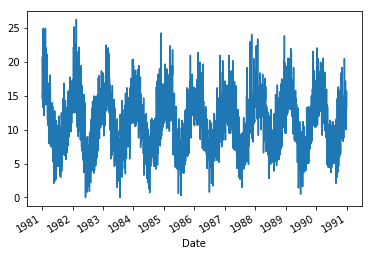

In [19]:
# Import Libraries
import pandas as pd
from matplotlib import pyplot

# Import Dataset
series = pd.Series.from_csv('daily-minimum-temperatures.csv', header=0)

# Convert values to float from str
for i in range(0,len(series)):
    series[i] = float(series[i])
# Printing out first 5 values of dataset
series.head()

# Plotting the dataset
series.plot()
pyplot.show()

To check for the autocorrelation, we can plot  observation at the previous time step (t-1) with the observation at the next time step (t+1) as a scatter plot.

This could be done manually by first creating a lag version of the time series dataset and using a built-in scatter plot function in the Pandas library.

But there is an easier way.

Pandas provides a built-in plot to do exactly this, called the lag_plot() function.

/home/deepshikha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  


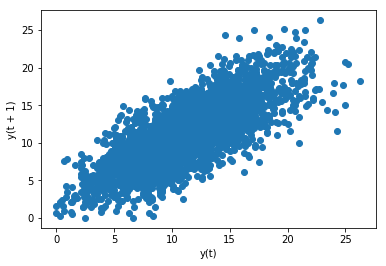

In [21]:
# Importing lag_plot
from pandas.tools.plotting import lag_plot

# Plotting the lagged values of the series
lag_plot(series)
pyplot.show()

Another way to find auto-correlation is to calculate the Pearson Correlation Coefficient

Wikipedia says - "Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations. The form of the definition involves a "product moment", that is, the mean (the first moment about the origin) of the product of the mean-adjusted random variables; hence the modifier product-moment in the name."

It's value lies between -1 and +1. -1 means total negative linear correlation, 0 means no linear correlation and +1 means positive linear correlation.

In [23]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.77362
t+1  0.77362  1.00000


Here, the lag value = 1 and the result shows that